In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0  # Import EfficientNet model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, confusion_matrix

# Define paths to your dataset folders
train_dir = "/kaggle/input/fundus-pytorch/train"
val_dir = '/kaggle/input/fundus-pytorch/val'
test_dir = '/kaggle/input/fundus-pytorch/test'

# Define image dimensions and batch size
img_size = 224  # EfficientNetB0 expects input size of at least 224x224
batch_size = 32

# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the EfficientNetB0 model pre-trained on ImageNet without the top classification layer
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the base model
x = GlobalAveragePooling2D()(base_model.output)  # Global average pooling instead of Flatten
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

# Create the model
model = Model(base_model.input, output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary')

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False)  # Disable shuffling for evaluation

# Train the model
history = model.fit(
    train_generator,
    epochs=8,
    validation_data=val_generator,
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy:", test_acc)

# Predict labels for the test set
predictions = model.predict(test_generator)
predicted_classes = predictions > 0.5  # Thresholding for binary classification

# Generate classification report and confusion matrix
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

print("Confusion Matrix:")
print(confusion_matrix(true_classes, predicted_classes))


Found 8621 images belonging to 2 classes.
Found 5747 images belonging to 2 classes.
Found 2874 images belonging to 2 classes.
Epoch 1/8


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/270 ━━━━━━━━━━━━━━━━━━━━ 3:45:28 50s/step - accuracy: 0.4375 - loss: 0.6960

I0000 00:00:1715075954.116633     107 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


270/270 ━━━━━━━━━━━━━━━━━━━━ 491s 2s/step - accuracy: 0.6026 - loss: 0.6746 - val_accuracy: 0.6158 - val_loss: 0.6680
Epoch 2/8
270/270 ━━━━━━━━━━━━━━━━━━━━ 292s 1s/step - accuracy: 0.6141 - loss: 0.6679 - val_accuracy: 0.6158 - val_loss: 0.6663
Epoch 3/8
270/270 ━━━━━━━━━━━━━━━━━━━━ 286s 1s/step - accuracy: 0.6143 - loss: 0.6693 - val_accuracy: 0.6158 - val_loss: 0.6661
Epoch 4/8
270/270 ━━━━━━━━━━━━━━━━━━━━ 323s 1s/step - accuracy: 0.6217 - loss: 0.6663 - val_accuracy: 0.6158 - val_loss: 0.6672
Epoch 5/8
270/270 ━━━━━━━━━━━━━━━━━━━━ 287s 1s/step - accuracy: 0.6090 - loss: 0.6721 - val_accuracy: 0.6158 - val_loss: 0.6661
Epoch 6/8
270/270 ━━━━━━━━━━━━━━━━━━━━ 285s 1s/step - accuracy: 0.6223 - loss: 0.6646 - val_accuracy: 0.6158 - val_loss: 0.6676
Epoch 7/8
270/270 ━━━━━━━━━━━━━━━━━━━━ 284s 1s/step - accuracy: 0.6190 - loss: 0.6668 - val_accuracy: 0.6158 - val_loss: 0.6668
Epoch 8/8
270/270 ━━━━━━━━━━━━━━━━━━━━ 281s 1s/step - accuracy: 0.6093 - loss: 0.6708 - val_accuracy: 0.6158 - val

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


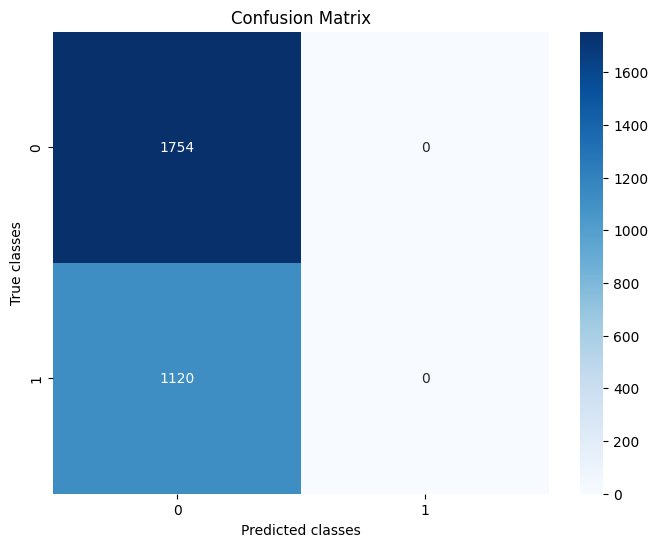

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(true_classes,predicted_classes), annot=True, cmap='Blues', fmt='g', 
             xticklabels=class_labels, 
            yticklabels=class_labels)
plt.xlabel('Predicted classes')
plt.ylabel('True classes')
plt.title('Confusion Matrix')
plt.show()

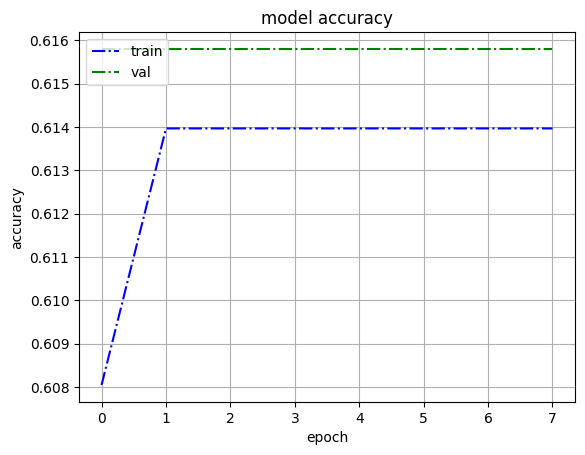

In [4]:
plt.plot(history.history['accuracy'],'b-.')
plt.plot(history.history['val_accuracy'],'g-.')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()